<a href="https://colab.research.google.com/github/khaloodi/DS-Unit-2-Regression-1/blob/master/ATVI_Stock_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

In [0]:
style.use('ggplot')

In [0]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()

df = web.DataReader('ATVI', 'yahoo', start, end)
df.to_csv('spy.csv')

In [0]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,47.509998,45.139999,45.250000,47.029999,7245700.0,46.655220
2019-01-03,46.650002,45.000000,46.439999,45.360001,8249000.0,44.998528
2019-01-04,47.549999,45.130001,46.000000,47.169998,9081900.0,46.794102
2019-01-07,49.080002,47.090000,47.240002,48.500000,9112100.0,48.113506
2019-01-08,51.110001,49.000000,49.070000,49.970001,12428700.0,49.571793


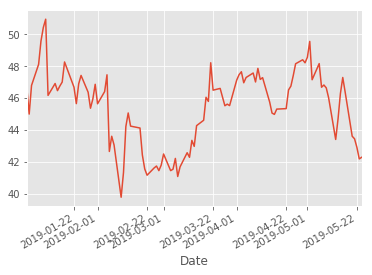

In [0]:
df['Adj Close'].plot()

In [0]:
predict = pd.DataFrame(df['Adj Close'].copy())

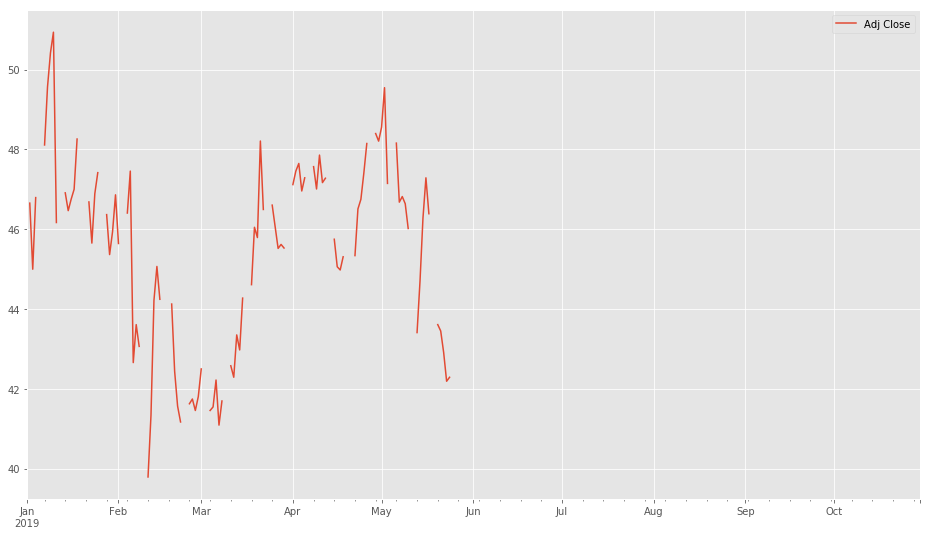

In [0]:
predict = predict.reindex(pd.date_range(start='2019-01-01', end='2019-10-30'))
predict.plot(figsize=(16,9));

In [0]:
predict.mean()

Adj Close    45.434984
dtype: float64

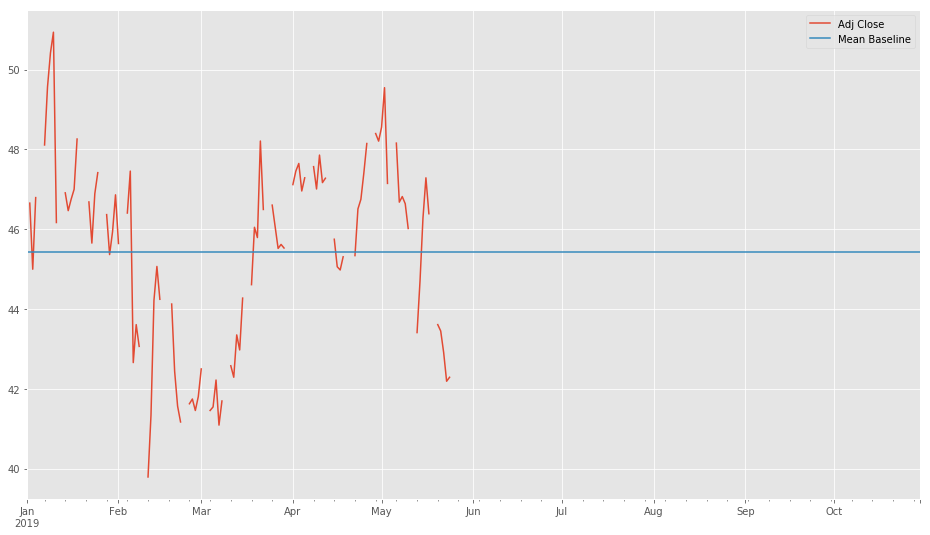

In [0]:
predict['Mean Baseline'] = predict['Adj Close'].mean()
predict.plot(figsize=(16,9));

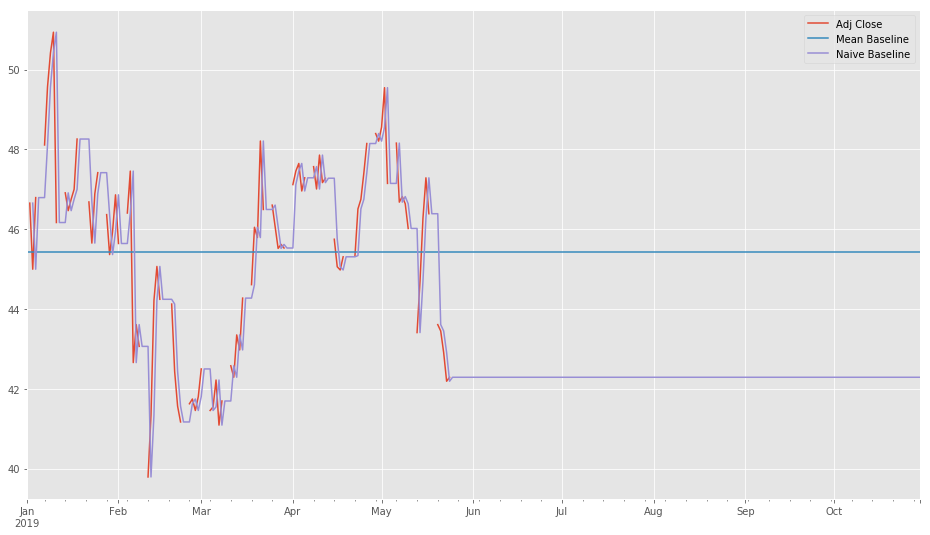

In [0]:
predict['Naive Baseline'] = predict['Adj Close'].shift(1).ffill()
predict.plot(figsize=(16,9));

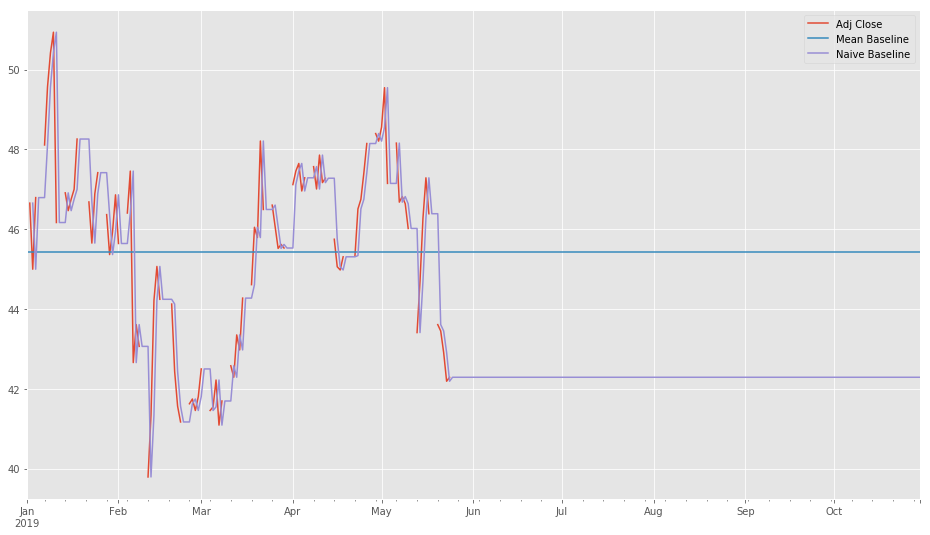

In [0]:
predict['2019-01':'2019-10'].plot(figsize=(16,9));

In [0]:
# import numpy as np
# predict['Drift Baseline'] = np.nan
# predict.loc['2015-01-01', 'Drift Baseline'] = df.loc['2015-01-01', 'Adj Close']
# predict.loc['2019-05-27', 'Drift Baseline'] = df.loc['2019-05-27', 'Adj Close']
# predict['Drift Baseline'] = predict['Drift Baseline'].interpolate(limit_area='inside')
# predict.plot(figsize=(16,9));

In [0]:
table = predict.reset_index().rename(columns={'index': 'ds', 'Adj Close': 'y'})

In [0]:
table['cap'] = 85

In [0]:
from fbprophet import Prophet
m = Prophet(growth='logistic')
m.fit(table)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
299,2019-10-27
300,2019-10-28
301,2019-10-29
302,2019-10-30
303,2019-10-31


In [0]:
future['cap'] = 85
future['floor'] = 0
forecast = m.predict(future)
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
299,2019-10-27,48.851136,85,46.426029,52.796540,47.290497,50.391939,0.541613,0.541613,0.541613,0.541613,0.541613,0.541613,0.0,0.0,0.0,49.392749
300,2019-10-28,48.867282,85,45.390776,51.802613,47.286249,50.417816,-0.406738,-0.406738,-0.406738,-0.406738,-0.406738,-0.406738,0.0,0.0,0.0,48.460544
301,2019-10-29,48.883425,85,45.258152,51.819450,47.281882,50.444554,-0.231910,-0.231910,-0.231910,-0.231910,-0.231910,-0.231910,0.0,0.0,0.0,48.651514
302,2019-10-30,48.899566,85,45.308132,52.017467,47.277516,50.472154,-0.197357,-0.197357,-0.197357,-0.197357,-0.197357,-0.197357,0.0,0.0,0.0,48.702209
303,2019-10-31,48.915705,85,45.882091,52.089602,47.274547,50.506161,0.014123,0.014123,0.014123,0.014123,0.014123,0.014123,0.0,0.0,0.0,48.929828


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


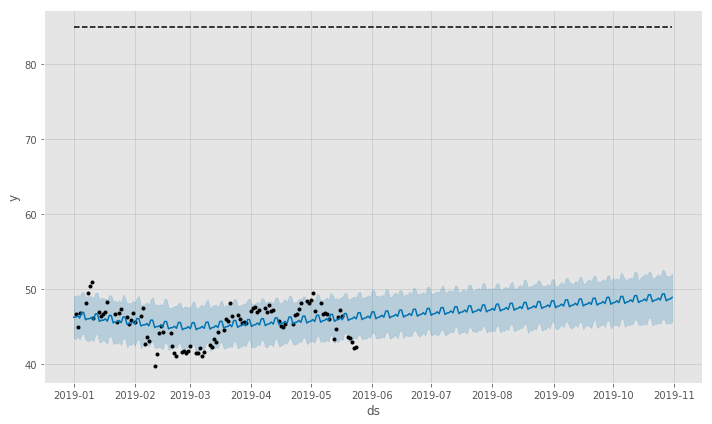

In [0]:
m = Prophet(growth='logistic')
m.fit(table)
fcst = m.predict(future)
fig = m.plot(fcst)

Text(66.375, 0.5, 'Price')

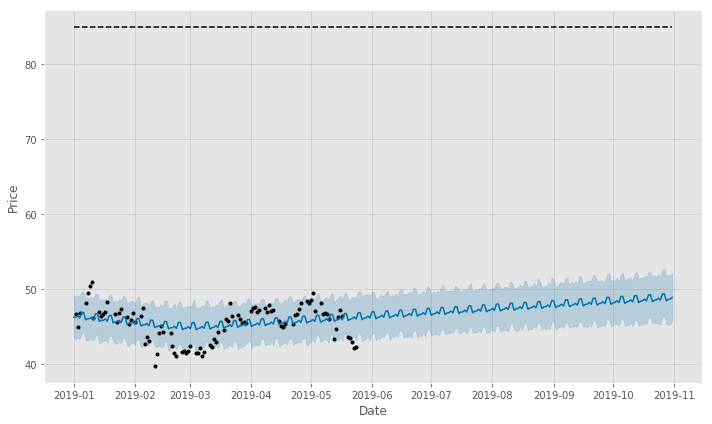

In [0]:
fig1 = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')

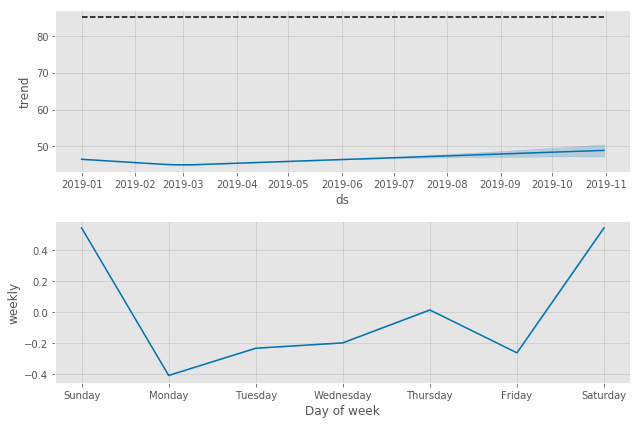

In [0]:
fig2 = m.plot_components(forecast)